# Latihan tahapan klasifikasi dengan naïve bayes #

Nama     : Dive Oktabid Fikhri

Nim      : A11.2022.14202

Kelompok : A11.4508

Melakukan Import Library

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

Melakukan Import Datasetnya

In [3]:
dataset = pd.read_csv('C:\smester 5\Data Maining\Tugas5\Social_Network_Ads.csv')
x = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, -1].values

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\divef\AppData\Local\Temp\ipykernel_18224\724175324.py:1: SyntaxWarning: invalid escape sequence '\s'
  dataset = pd.read_csv('C:\smester 5\Data Maining\Tugas5\Social_Network_Ads.csv')


Memisahkan dataset menjadi Training set dan Test set

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state= 0 )

Melakukan Scalling Fiture

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler ()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Melakukan pelatihan model metode Naive Bayes di Training Set

In [6]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB ()
classifier.fit(x_train, y_train)

GaussianNB()

Melakukan Prediksi ke Hasil test

In [7]:
y_pred = classifier.predict(x_test)

Membuat Matriks Kebingungan

In [8]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[65  3]
 [ 7 25]]


Mengvisualisasi Training menjadi Hasil set

C:\Users\divef\AppData\Local\Temp\ipykernel_18224\61481470.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


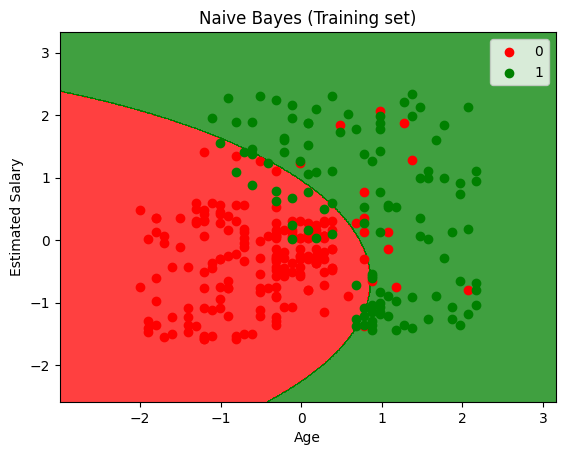

In [9]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop  = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
                    alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Melakukan Visualisasi Hasil Testnya

C:\Users\divef\AppData\Local\Temp\ipykernel_18224\3623176782.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


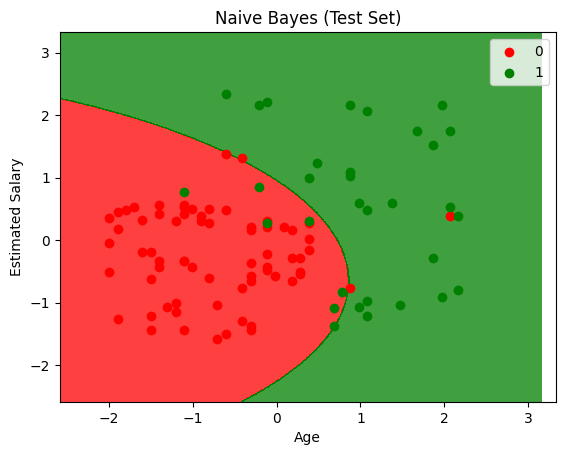

In [10]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test , y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set [:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set [:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red' , 'green')))
plt.xlim(x1.min(), x1.max())
plt.xlim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()